<b>Finding Out Layer</b>

<b>Disadvantages of OutLayer:</b>

1. It affects a lot in statistical analysis.

2. It affects a lot in Mean and Standard deviation


Outlayer will generally be in less numbers

<b>ways of finding Outlayer:</b>

1. Z-score
2. Boxplot
3. Interquartile(IQR)

<b>Z-score</b> is used in finding the outlayer 
what is Z-score ,The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score". 

https://www.mathsisfun.com/data/standard-normal-distribution.html

https://www.mathsisfun.com/data/standard-deviation.html
    
If the z score of a data point is more than 3 Standard deviation, it indicates that the data point is quite
different from the other data points. Such a data point can be an outlier.

<b>Z-score = (x-mean)/Standard deviation</b>

<b> BoxPlot</b> is used in finding the outlayer in data set it can be done using <b>Seaborn</b>

In [46]:
import numpy as np  

data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2] 
mean = np.mean(data) 
std = np.std(data) 
print('mean of the dataset is :-', mean) 
print('std. deviation is      :-', std)


threshold = 3
outlier = [] 
for i in data: 
    z_score = (i-mean)/std 
    if z_score > threshold: 
        outlier.append(i) 
print('\noutlier in dataset is  :-', outlier) 

mean of the dataset is :- 2.6666666666666665
std. deviation is      :- 3.3598941782277745

outlier in dataset is  :- [15]


<AxesSubplot:>

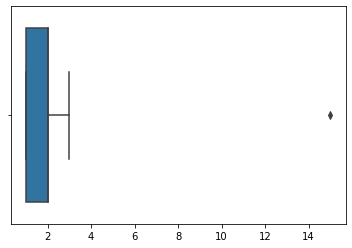

In [47]:
#BOXPLOT
import seaborn as sns
sns.boxplot(data)

<b>Interquartile(IQR) steps</b> 

for Interquartile(IQR) 1st we need to know what is percentile

1. arrage the data in Increasing order.
2. Calculate 1st(q1) and 3rd quantile(q3)
3. Finding Interquantile range(q3-q1)
4. Find the Lower Bond q1-(1.5*iqr value)
5. Find the Upper Bond q3+(1.5*iqr value)

Anything that Lies outside the Lower and Upperbond is outlayer

why 1.5 ? : - it is based on distribution pattern.Most suitable value found out for multiplying that is being proved 

in IQR most number we focus on is 25%(percentile) and 75%(percentile)
then <b>IQR = 75% - 25%</b>

In python we use <b>np.percentile</b> 

In [49]:
Q_1,Q_3 = np.percentile(data,[25,75])
print('Quartile 1 :-',Q_1 ,'\n')
print('Quartile 3 :-',Q_3,'\n')

iqr_value = Q_3-Q_1
print('iqr Value',iqr_value,'\n')

Lower_bond = Q_1 - (1.5*iqr_value)
Upper_bond = Q_3 + (1.5*iqr_value)

print('Lower bond :-', Lower_bond,'\n')
print('Upper_bond bond :-', Upper_bond,'\n')
print('Anything that Lies outside the Lower and Upperbond is outlayer')

Quartile 1 :- 1.0 

Quartile 3 :- 2.0 

iqr Value 1.0 

Lower bond :- -0.5 

Upper_bond bond :- 3.5 

Anything that Lies outside the Lower and Upperbond is outlayer


###  Related With Outliers And Impact On Machine Learning!!

##### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

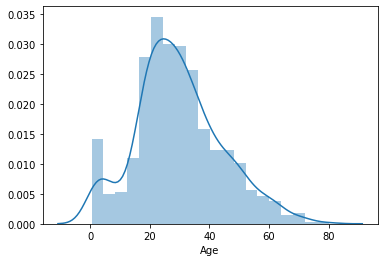

In [5]:
#sns.distplot(df['Age'].dropna()) # dropping NA
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

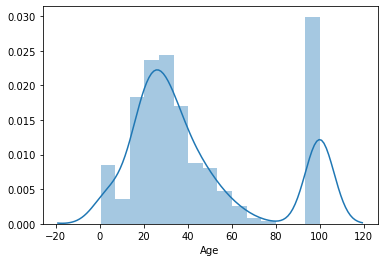

In [6]:
# we are replacing null values with 100 to create outlayer ..just for example

sns.distplot(df['Age'].fillna(100))

if we have normal distribution then we use techniques called <b>estimate outlayer or extreme value analysis</b>
and we apply different formula for IQR .

#### Gaussian Distributed

Text(0, 0.5, 'No of passenger')

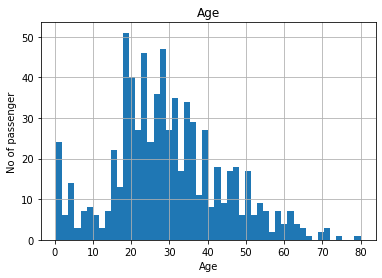

In [11]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

#Now we can see data is normally or Gaussian distributed. here we can use 3 Standard Distribution

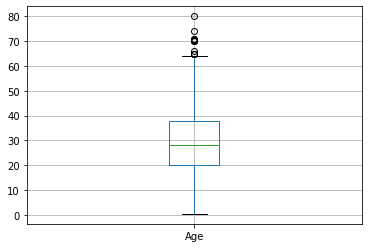

In [12]:
# plotting box plot for finding outlayer
figure=df.boxplot(column="Age")

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### If The Data Is Normally Distributed We use this

In [16]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

### anything beyond upperbond is a outlayer and we can remove in the case of Normal or Gaussian distribution.

### we can use this methord or we can use Z-score methord

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

In [ ]:
##these 3 cell steps are used when the data is skewed

In [8]:
### Lets compute IQR to calculate boundary
IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [17]:
#Find the Lower Bond q1-(1.5*iqr value)
#Find the Upper Bond q3+(1.5*iqr value) 

Lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
Upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)
print(Lower_bridge),print(Upper_bridge)

#Anything that Lies outside the Lower and Upperbond is outlayer

#Multiply with 3 instead of 1.5 if we want to find the exptreme Outlayer

-6.6875
64.8125


(None, None)

In [16]:
#extreme Outlayer
Lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
Upper_bridge = df['Age'].quantile(0.75) + (IQR*3)
print(Lower_bridge),print(Upper_bridge)

-33.5
91.625


(None, None)

#### If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

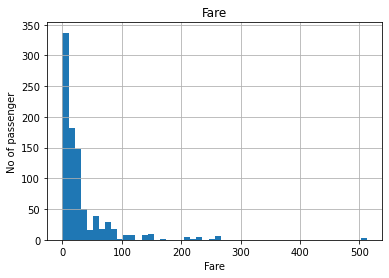

In [19]:
# New data column called Fare

figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

#this is a skewed datacolumn

<AxesSubplot:>

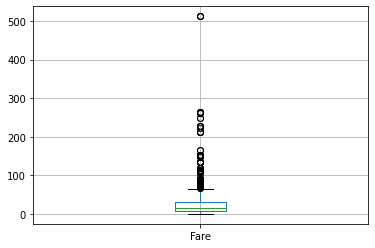

In [20]:
df.boxplot(column="Fare")

In [25]:
df['Fare'].describe() # see the difference between Max and 75% percentile

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [26]:
#Find the Lower Bond q1-(1.5*iqr value)
#Find the Upper Bond q3+(1.5*iqr value) 

Lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
Upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print(Lower_bridge),print(Upper_bridge)

#Anything that Lies outside the Lower and Upperbond is outlayer

#Multiply with 3 instead of 1.5 if we want to find the exptreme Outlayer

-26.724
65.6344


(None, None)

In [27]:
### extreme Outlayer
Lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
Upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(Lower_bridge),print(Upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [ ]:
#### follow top 3 cells for skewed data set

## extreme outlayer is considered when our data is Skewed

In [37]:
data=df.copy()

In [38]:
data.loc[data['Age']>=73,'Age']=73 ## upper boundary for AGE is 73 so anything grater than 73 will be replace with 73

In [39]:
data.loc[data['Fare']>=100,'Fare']=100  ## upper boundary for Fare is 100 so anything grater than 100 will be replace with 100


#we can also remove the outlayer

Text(0, 0.5, 'No of passenger')

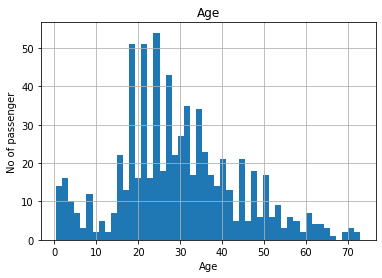

In [42]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

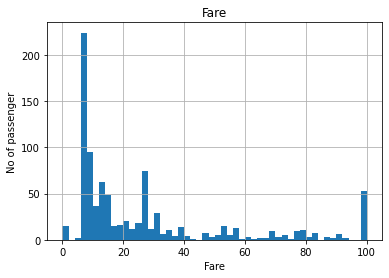

In [43]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

### now we can see the Max point is 100

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [45]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6529850746268657
roc_auc_score: 0.6785119047619047


<b>What is Precision?</b>

Right – so now we come to the crux of this article. What in the world is Precision? And what does all the above learning have to do with it?

In the simplest terms, Precision is the ratio between the True Positives and all the Positives. For our problem statement, that would be the measure of patients that we correctly identify having a heart disease out of all the patients actually having it. Mathematically:

<b>Precision = TP / TP+FP </b>

What is the Precision for our model? Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.

Precision also gives us a measure of the relevant data points. It is important that we don’t start treating a patient who actually doesn’t have a heart ailment, but our model predicted as having it.

 

<b>What is Recall?</b>

The recall is the measure of our model correctly identifying True Positives. Thus, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease. Mathematically:

<b>Recall = TP / TP+FN </b>

For our model, Recall  = 0.86. Recall also gives a measure of how accurately our model is able to identify the relevant data. We refer to it as Sensitivity or True Positive Rate. What if a patient has heart disease, but there is no treatment given to him/her because our model predicted so? That is a situation we would like to avoid!

<b>The Role of the F1-Score</b>

Understanding Accuracy made us realize, we need a tradeoff between Precision and Recall. We first need to decide which is more important for our classification problem.

For example, for our dataset, we can consider that achieving a high recall is more important than getting a high precision – we would like to detect as many heart patients as possible. For some other models, like classifying whether a bank customer is a loan defaulter or not, it is desirable to have a high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters.

There are also a lot of situations where both precision and recall are equally important. For example, for our model, if the doctor informs us that the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, then we would aim for not only a high recall but a high precision as well.

In such cases, we use something called F1-score. F1-score is the Harmonic mean of the Precision and Recall:

<b>F1-Score = 2 * (precision * recall / precision + recall)</b>

This is easier to work with since now, instead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well.

We can generate the above metrics for our dataset using sklearn too:

<b>print(classification_report(y_test, y_pred))</b>